# Livrable Final Projet IA et Machine Learning 
# Contexte:
L’entreprise pharmaceutique HumanForYou fait face à un taux de rotation annuel élevé de ses employés.
Ce phénomène entraîne des retards de projets, des coûts RH importants et une perte de productivité.
La direction souhaite mieux comprendre les causes de ces départs.
# Objectif
Analyser les données RH afin d’identifier les facteurs pouvant influencer l’attrition des employés.
Mettre en évidence des indicateurs liés au temps de travail et à la qualité de vie professionnelle.

# Attendus 
Explorer et nettoyer les données fournies

Analyser les horaires de travail des employés

Identifier des comportements à risque (absences, retards, longues journées)

Produire des indicateurs exploitables pour la suite de l’analyse

# Démarche 
- Chargement ,compréhension des données , Nettoyage et gestion des valeurs manquantes sur chaque fichier 

- Appliquer une  EDA globale sur la concatenation de des fichiers nettoyés

- Choix du modèle de prédiction 
- variation des hyperparamètres et conclusion



# I - Chargement ,compréhension des données , nettoyage, et gestion des valeurs manquantes sur chaque fichier csv

 

## I.1-fichier Général

In [1]:
import pandas as pd
import numpy as np

# Chargement du fichier
general_data = pd.read_csv("data/general_data.csv")

# Affichage des premières lignes
general_data.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [2]:
# Infos sur le dataset
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

**Types de variables**

**14** variables numériques entières (int64)

**2** variables numériques continues (float64)

**8** variables catégorielles (object)

Le dataset est mixte, ce qui est classique pour des données RH : certaines variables sont quantitatives (salaire, ancienneté…), d’autres qualitatives (sexe, département, métier…).

**verification des valeurs manquantes**

| Variable                | Non-null count     |
| ----------------------- | ------------------ |
| NumCompaniesWorked      | 4391               |
| TotalWorkingYears       | 4401               |
| Toutes les autres       | 4410               |

il y'a donc **19 valeurs manquantes** dans la colonne NumCompaniesWorked,
**9 valeurs manquantes** dans la colonne TotalWorkingyears

In [3]:
# Statistiques descriptives pour les variables numériques
general_data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [4]:
# Liste des colonnes constantes
constant_columns = [col for col in general_data.columns if general_data[col].nunique() == 1]

print("Colonnes constantes : ", constant_columns)

Colonnes constantes :  ['EmployeeCount', 'Over18', 'StandardHours']


In [5]:
general_data.drop(columns=constant_columns, inplace=True)

In [6]:
#visualisation des variables categorielles
categorical_cols = general_data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(general_data[col].value_counts())


--- Attrition ---
Attrition
No     3699
Yes     711
Name: count, dtype: int64

--- BusinessTravel ---
BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64

--- Department ---
Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64

--- EducationField ---
EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: count, dtype: int64

--- Gender ---
Gender
Male      2646
Female    1764
Name: count, dtype: int64

--- JobRole ---
JobRole
Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: count,

**gestion des valeurs manquantes**

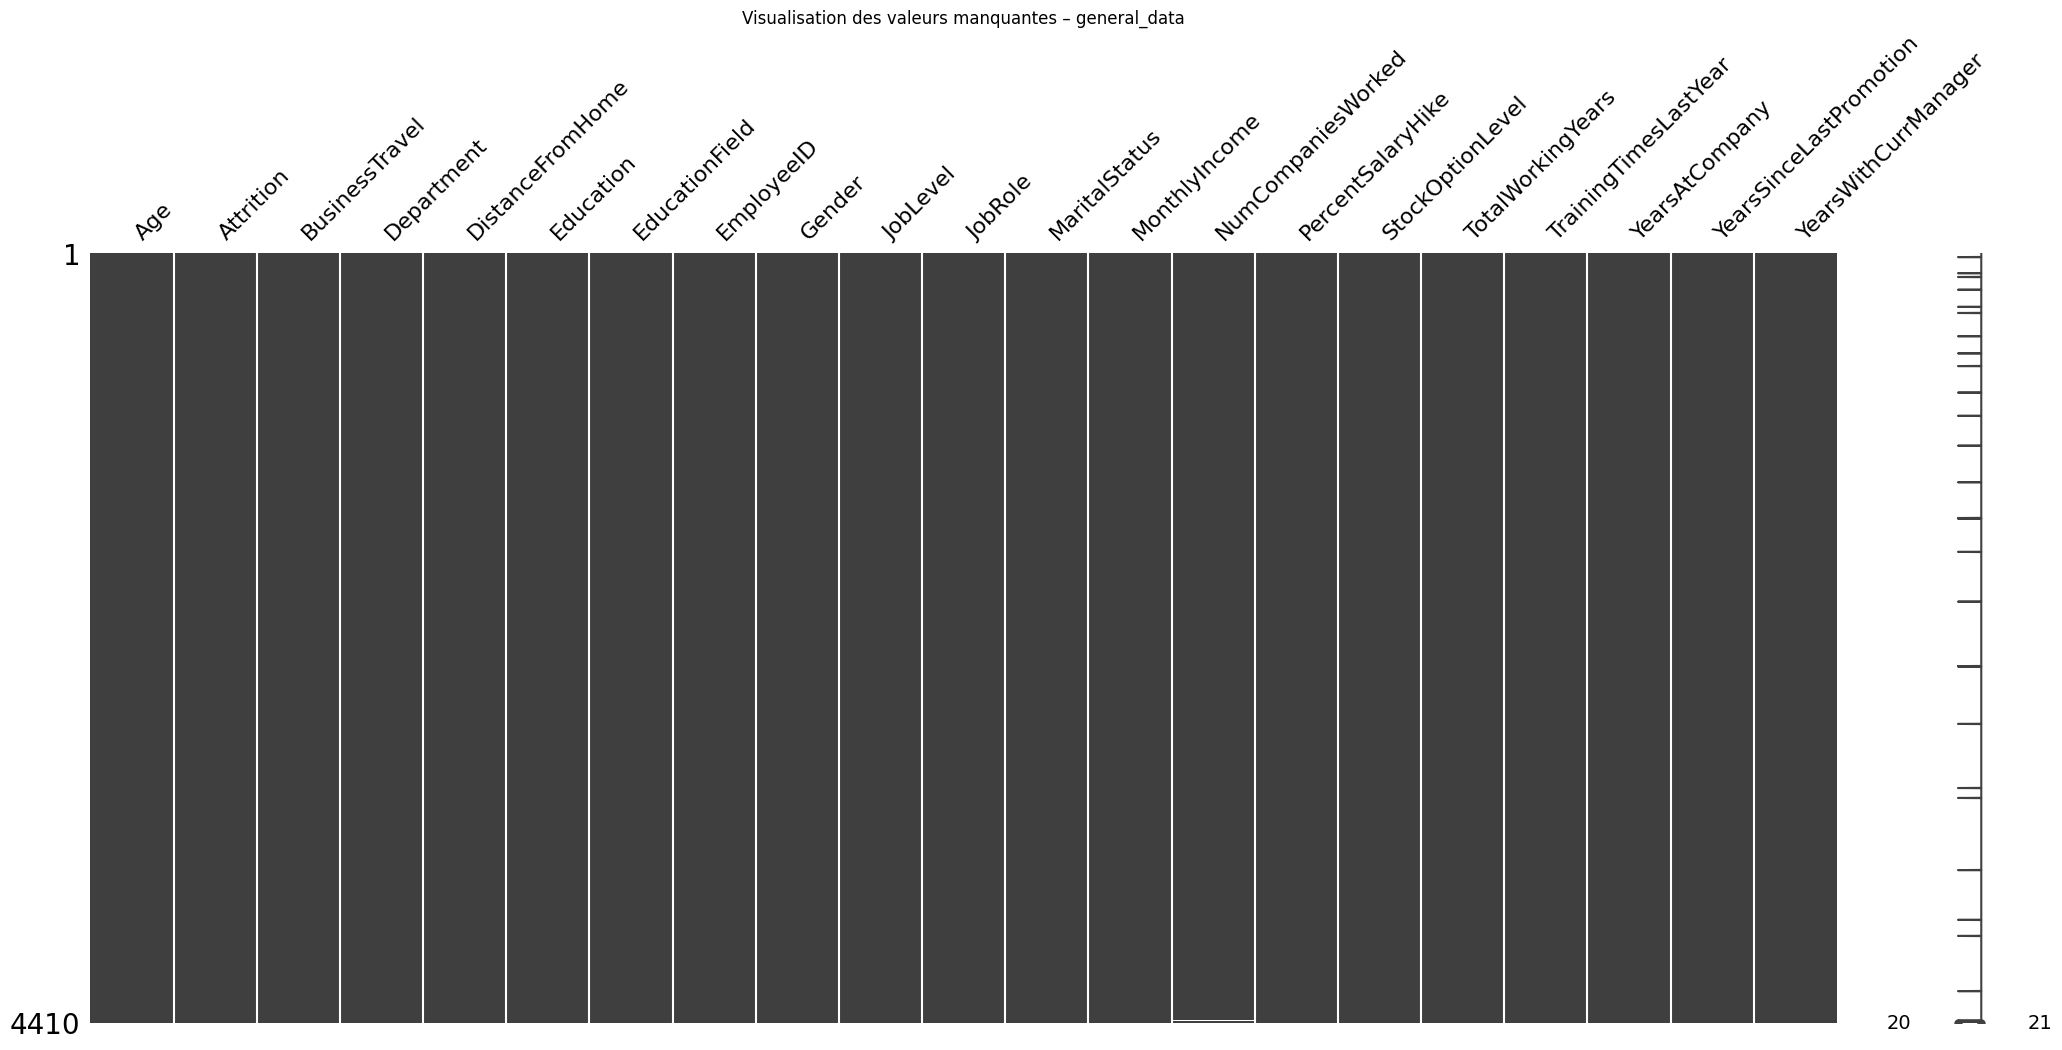

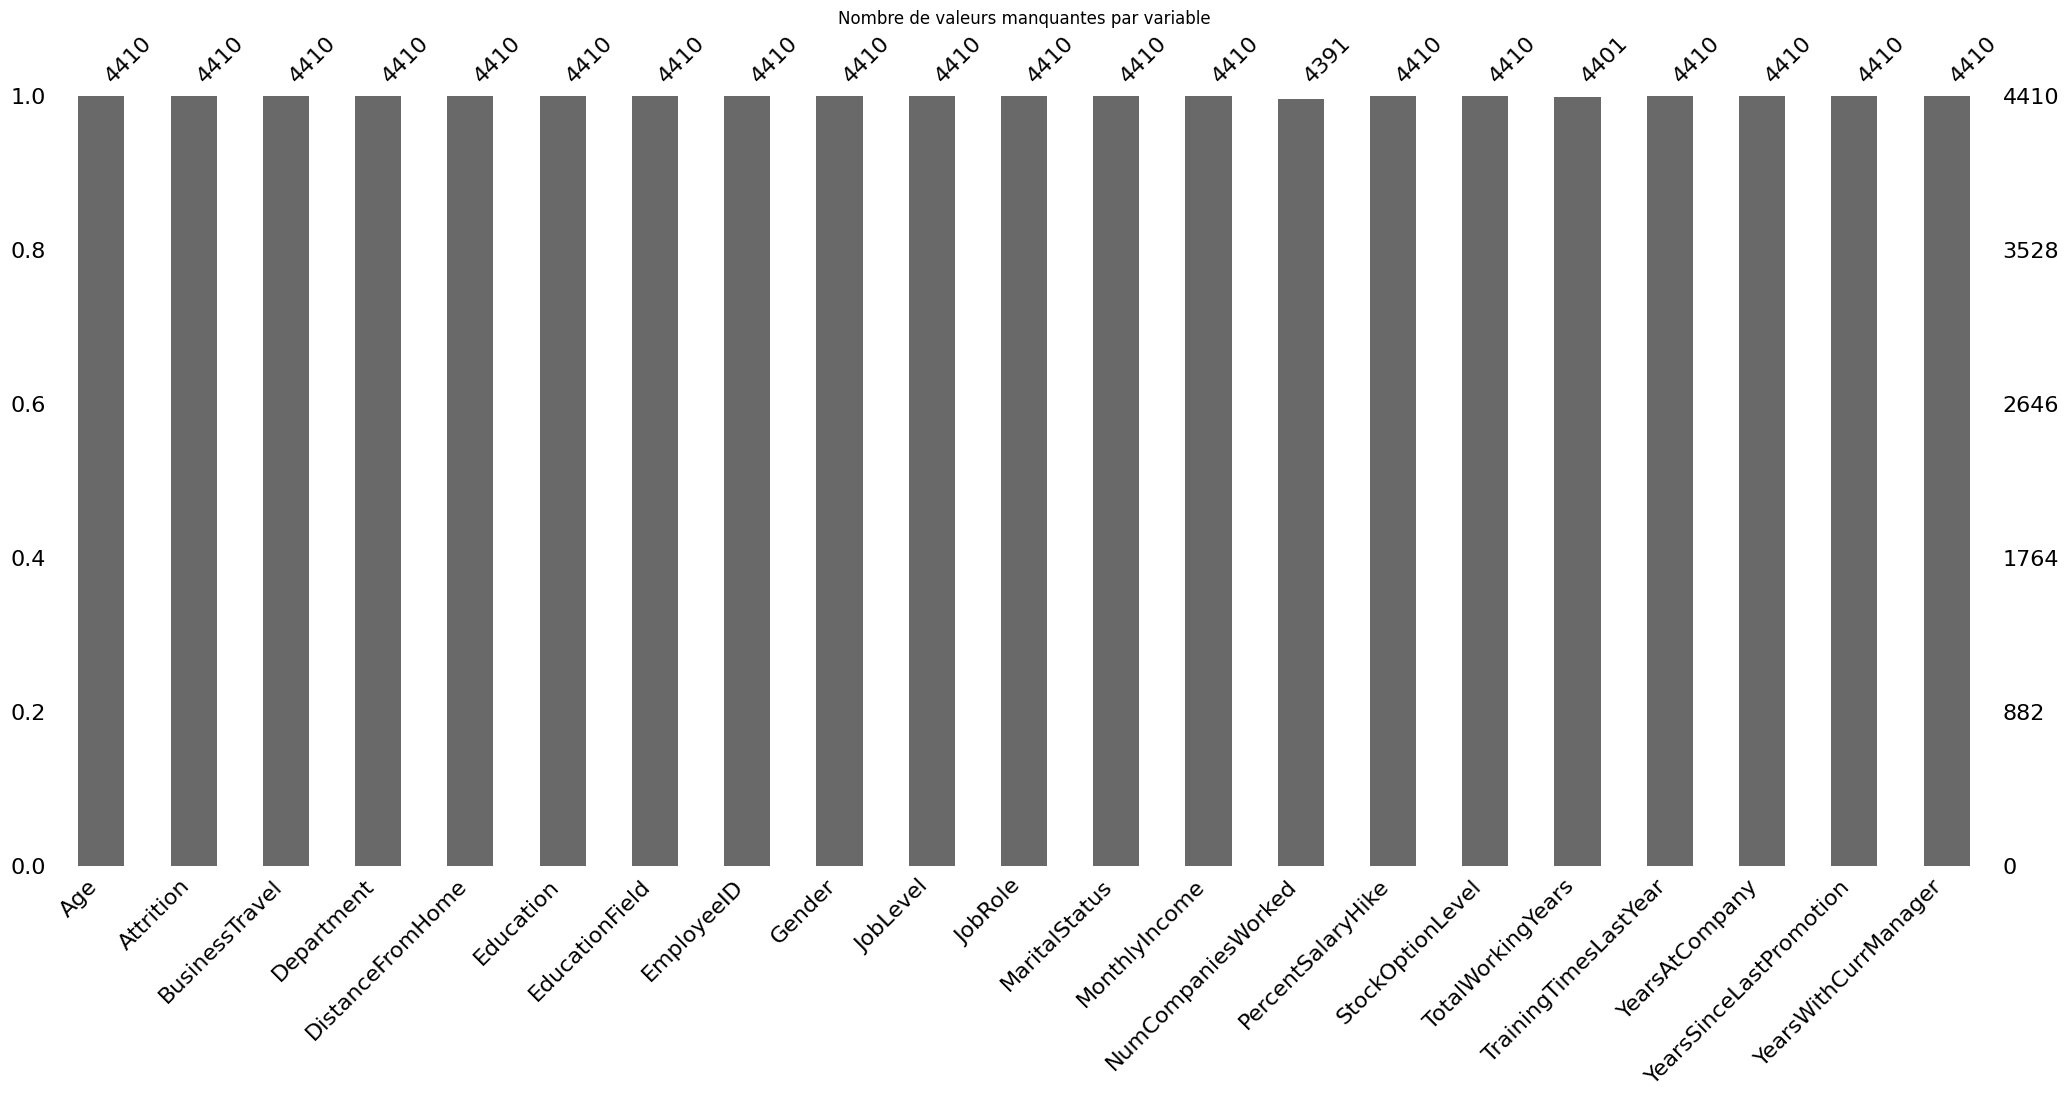

In [7]:

import matplotlib.pyplot as plt
import missingno as msno
# Afficher la matrice des valeurs manquantes
msno.matrix(general_data)
plt.title("Visualisation des valeurs manquantes – general_data")
plt.show()

# Afficher le barplot des valeurs manquantes
msno.bar(general_data)
plt.title("Nombre de valeurs manquantes par variable")
plt.show()

In [8]:
general_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

**remplissage des valeurs manquantes par la médianes**

In [9]:
# Colonnes avec valeurs manquantes
missing_cols = ["NumCompaniesWorked", "TotalWorkingYears"]

for col in missing_cols:
    median_value = general_data[col].median()
    general_data[col].fillna(median_value, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10316\4099499834.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  general_data[col].fillna(median_value, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10316\4099499834.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [10]:
#Sauvegarde du dataset nettoyé 
import os
folder = "Data_cleaned"

os.makedirs(folder, exist_ok=True)

general_data.to_csv(f"{folder}/general_data.csv", index=False)

## I.2 fichier Dernieres Evaluations du Manager

In [11]:
manager_survey = pd.read_csv("data/manager_survey_data.csv")

# Aperçu des premières lignes
manager_survey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [12]:
manager_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [13]:
manager_survey.describe()

,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.729932,3.153741
std,1273.201673,0.711400,0.360742
min,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000
75%,3307.750000,3.000000,3.000000
max,4410.000000,4.000000,4.000000


on remarque qu'il n'y a pas de valeurs manquantes dans ce fichier donc on sauvegarde l'ancien

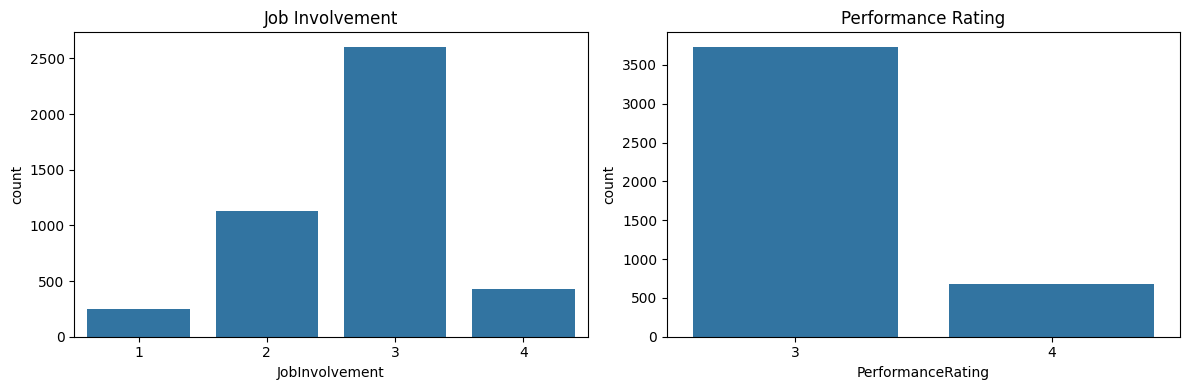

In [14]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x="JobInvolvement", data=manager_survey, ax=axes[0])
axes[0].set_title("Job Involvement")

sns.countplot(x="PerformanceRating", data=manager_survey, ax=axes[1])
axes[1].set_title("Performance Rating")

plt.tight_layout()
plt.show()

In [15]:
#Sauvegarde du dataset nettoyé 
import os
folder = "Data_cleaned"

os.makedirs(folder, exist_ok=True)

manager_survey.to_csv(f"{folder}/manager_survey_data.csv", index=False)

## I.3 Fichier Enquete qualité de vie au travail

In [16]:
# Charger le dataset
employees= pd.read_csv('data/employee_survey_data.csv')


# Afficher les premières lignes du dataset
employees.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [17]:
#Display basic information
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [18]:
# Display summary statistics
employees.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4385.000000,4390.000000,4372.000000
mean,2205.500000,2.723603,2.728246,2.761436
std,1273.201673,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


Synthèse des valeurs manquantes 
| Variable                | Valeurs manquantes |
| ----------------------- | ------------------ |
| EnvironmentSatisfaction | 25                 |
| JobSatisfaction         | 20                 |
| WorkLifeBalance         | 38                 |

**remplissage des valeurs manquantes**

In [19]:
survey_columns = [
    "EnvironmentSatisfaction",
    "JobSatisfaction",
    "WorkLifeBalance"
]

for col in survey_columns:
    median_value = employees[col].median()
    employees[col].fillna(median_value, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10316\714019702.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  employees[col].fillna(median_value, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10316\714019702.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [20]:
employees.isnull().sum()#verifions si les valeurs manquantes ont été remplies

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

**Sauvegarde du dataset nettoyé**

In [21]:
folder = "Data_cleaned"

os.makedirs(folder, exist_ok=True)

employees.to_csv(f"{folder}/employee_survey_data.csv", index=False)

## I.4 Fichier des horaires de travail

In [22]:
import zipfile

with zipfile.ZipFile("data/in_out_time.zip", "r") as zip_ref:
    zip_ref.extractall("in_out_time")

In [23]:
in_time = pd.read_csv("in_out_time/in_time.csv")
out_time = pd.read_csv("in_out_time/out_time.csv")

# Aperçu
in_time.head()
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [24]:
# Aperçu
in_time.info()
out_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


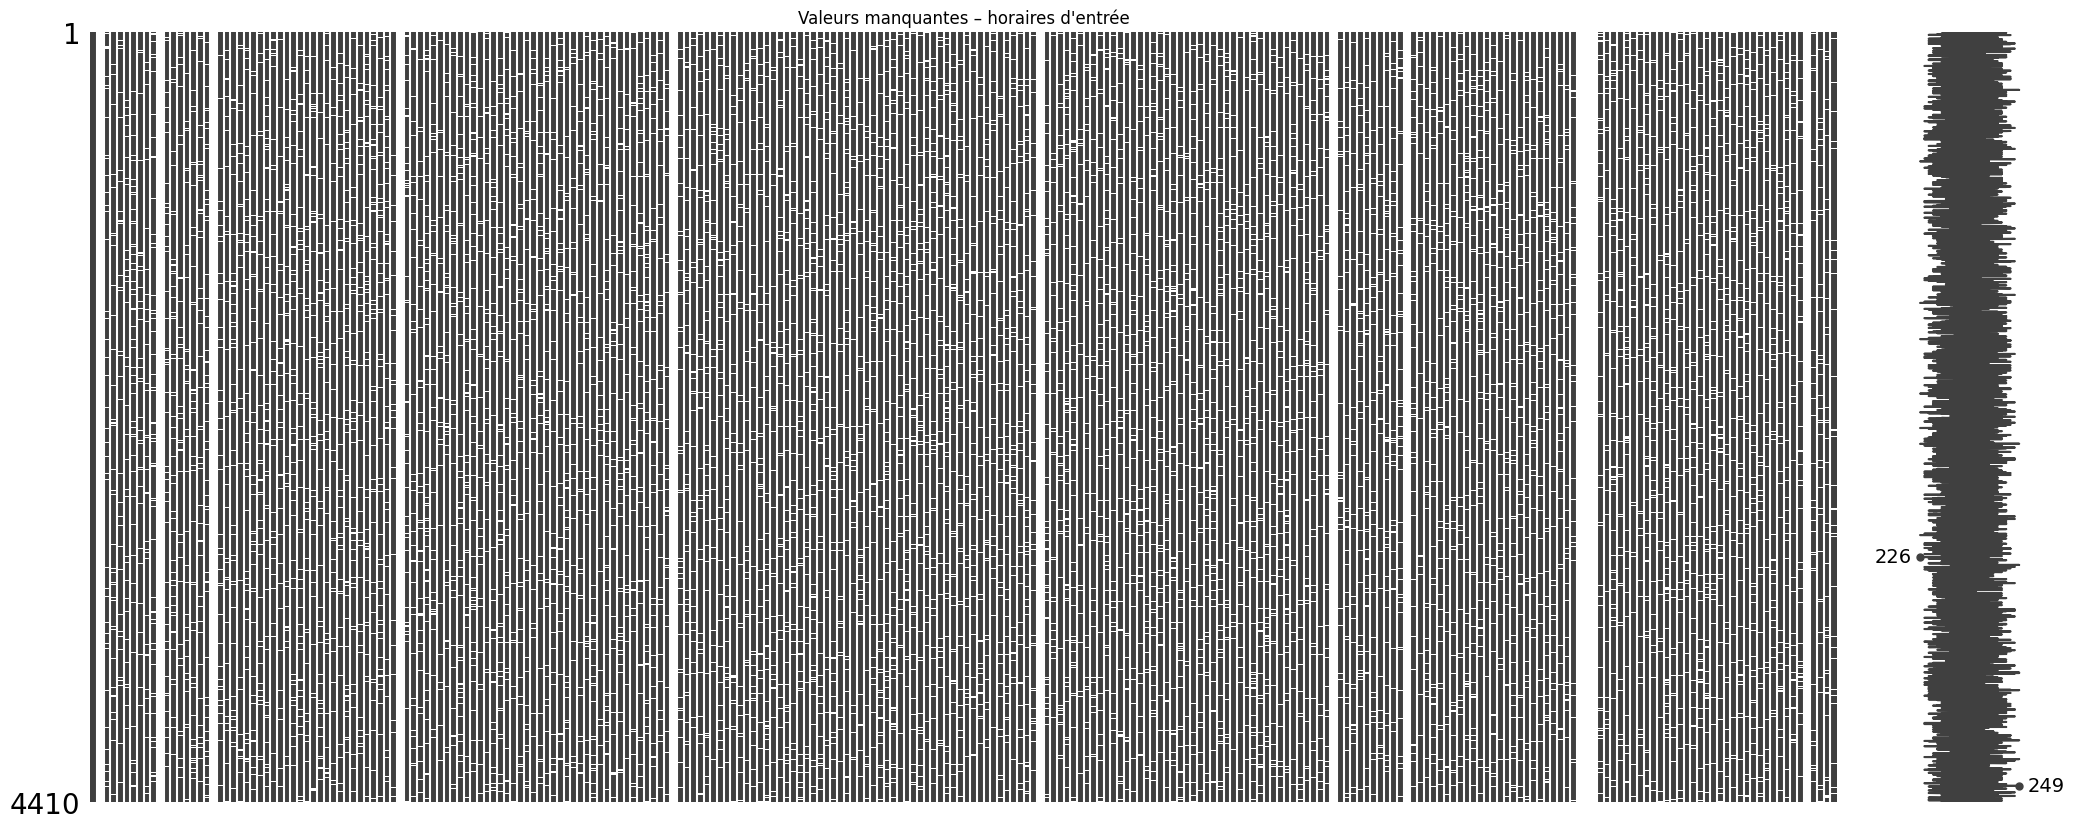

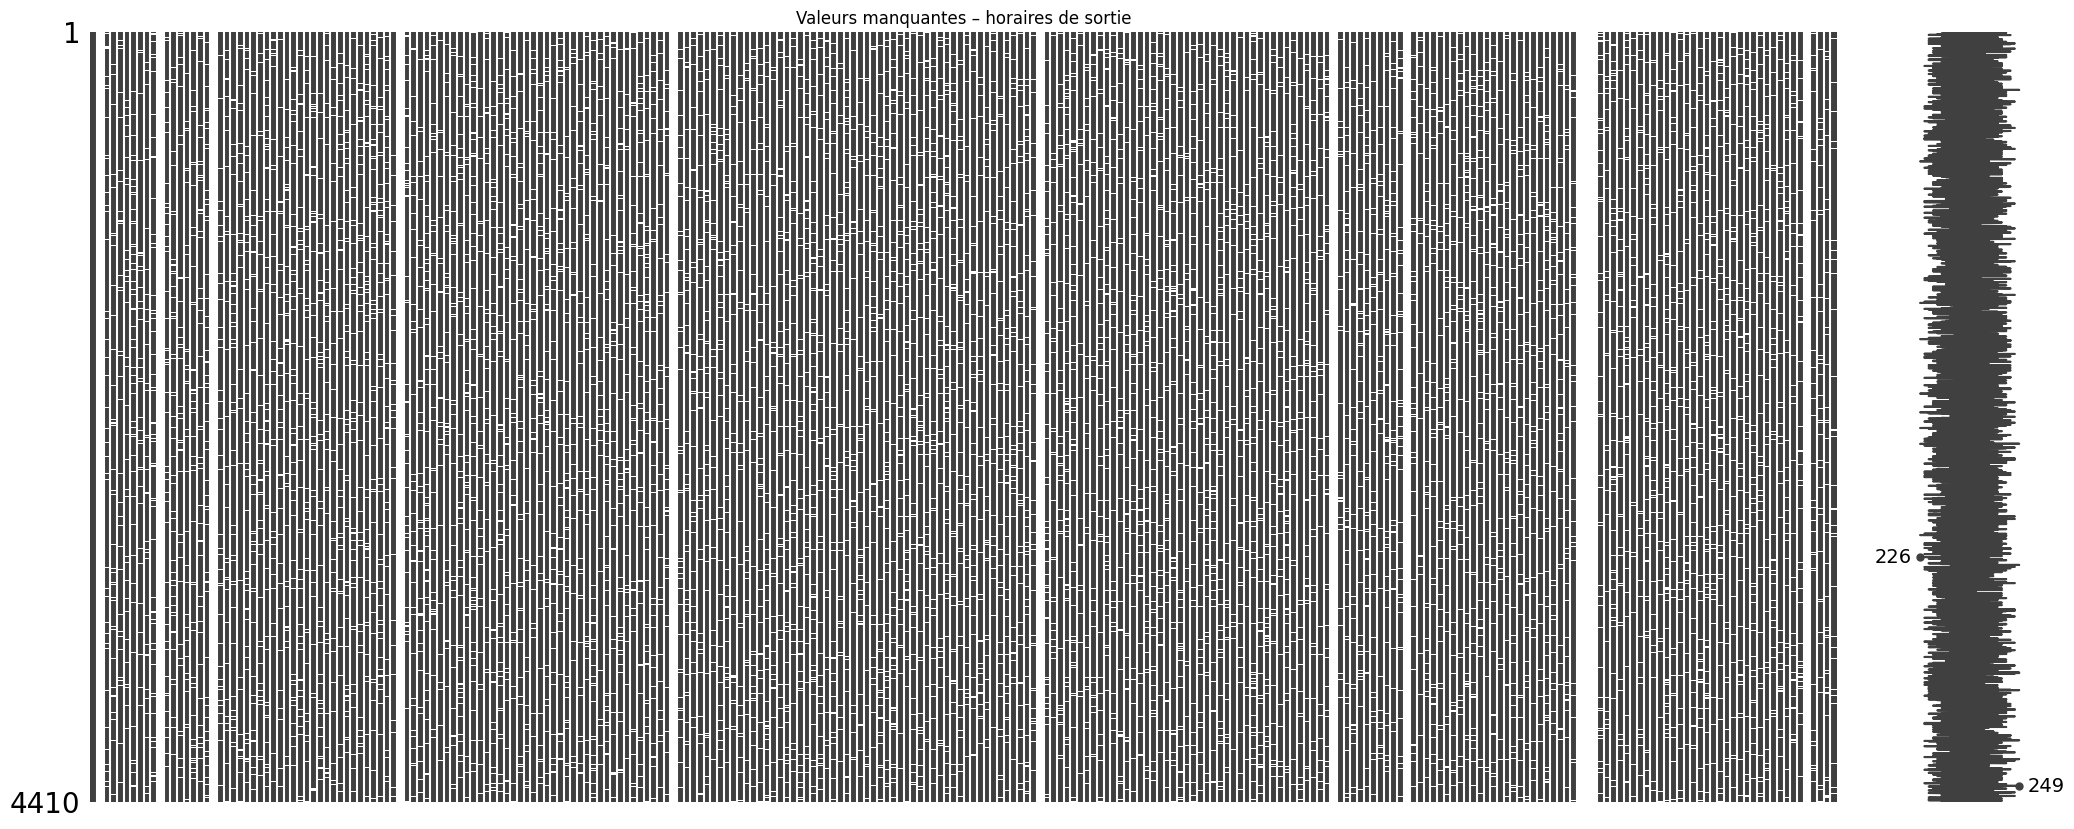

In [25]:
#valeurs manquantes 
msno.matrix(in_time)
plt.title("Valeurs manquantes – horaires d'entrée")
plt.show()

msno.matrix(out_time)
plt.title("Valeurs manquantes – horaires de sortie")
plt.show()

In [26]:
in_time.isnull().sum()
out_time.isnull().sum()

Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64

In [27]:
#renommer la colonne "Unnamed par EmployeeID"
in_time.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
out_time.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)

#Passer du format large → format long ()
in_time_long = in_time.melt(
    id_vars="EmployeeID",
    var_name="Date",
    value_name="InTime"
)

In [28]:
out_time_long = out_time.melt(
    id_vars="EmployeeID",
    var_name="Date",
    value_name="OutTime"
)

Les fichiers d’horaires sont fournis sous un format large issu directement du système de badgeuse, où chaque colonne représente une date et chaque cellule un horodatage.
Afin de permettre l’analyse temporelle, le calcul des durées de travail et la gestion des valeurs manquantes, les données ont été transformées vers un format long, dans lequel chaque ligne correspond à un employé et une date donnée.

In [29]:
# conversion des types : NA devient NAT
in_time_long["Date"] = pd.to_datetime(in_time_long["Date"])
in_time_long["InTime"] = pd.to_datetime(in_time_long["InTime"], errors="coerce")

out_time_long["Date"] = pd.to_datetime(out_time_long["Date"])
out_time_long["OutTime"] = pd.to_datetime(out_time_long["OutTime"], errors="coerce")

In [30]:
in_time_long.head(10)

,EmployeeID,Date,InTime
0,1,2015-01-01,NaT
1,2,2015-01-01,NaT
2,3,2015-01-01,NaT
3,4,2015-01-01,NaT
4,5,2015-01-01,NaT
5,6,2015-01-01,NaT
6,7,2015-01-01,NaT
7,8,2015-01-01,NaT
8,9,2015-01-01,NaT
9,10,2015-01-01,NaT


In [31]:
in_time_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151010 entries, 0 to 1151009
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   EmployeeID  1151010 non-null  int64         
 1   Date        1151010 non-null  datetime64[ns]
 2   InTime      1041930 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 26.3 MB


In [32]:
in_time_long.dropna(subset=["InTime"]).head()

,EmployeeID,Date,InTime
4410,1,2015-01-02,2015-01-02 09:43:45
4411,2,2015-01-02,2015-01-02 10:15:44
4412,3,2015-01-02,2015-01-02 10:17:41
4413,4,2015-01-02,2015-01-02 10:05:06
4414,5,2015-01-02,2015-01-02 10:28:17


près transformation des données de badgeage en format long, chaque ligne correspond à un employé pour une date donnée. La colonne InTime indique l’heure exacte d’arrivée au poste, tandis que la colonne Date permet de structurer l’analyse journalière. Cette organisation facilite les analyses temporelles et le calcul d’indicateurs liés au temps de travail.

In [33]:
#fusionner les heures d'entrer et de sortie 
time_df = pd.merge(in_time_long, out_time_long, on=["EmployeeID", "Date"], how="outer")

In [34]:
#calcul des heures travaillées
# # Convertir en datetime 
# time_df["InTime"] = pd.to_datetime(time_df["InTime"], errors="coerce")
# time_df["OutTime"] = pd.to_datetime(time_df["OutTime"], errors="coerce")

# Calculer la durée de travail
time_df["WorkDuration"] = (time_df["OutTime"] - time_df["InTime"]).dt.total_seconds() / 3600  # en heures

**gestion des valeurs manquantes**

In [35]:
time_df.isna().sum()#identifier les absences ou retard

EmployeeID           0
Date                 0
InTime          109080
OutTime         109080
WorkDuration    109080
dtype: int64

In [36]:
time_df["WorkDuration"].fillna(0, inplace=True)#remplacer les absences par 0 heure de travail

C:\Users\HP\AppData\Local\Temp\ipykernel_10316\1310105993.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  time_df["WorkDuration"].fillna(0, inplace=True)#remplacer les absences par 0 heure de travail


In [37]:
time_df.isna().sum()

EmployeeID           0
Date                 0
InTime          109080
OutTime         109080
WorkDuration         0
dtype: int64

**créer des indicateurs temporelles**

- longues journées: journées superieures à 8h

In [38]:
time_df["LongDay"] = time_df["WorkDuration"] > 9

- absences répétées  

In [39]:
absence_summary = time_df.groupby("EmployeeID")["WorkDuration"].apply(lambda x: (x==0).sum()).reset_index()
absence_summary.rename(columns={"WorkDuration": "AbsenceDays"}, inplace=True)

**visualisation**

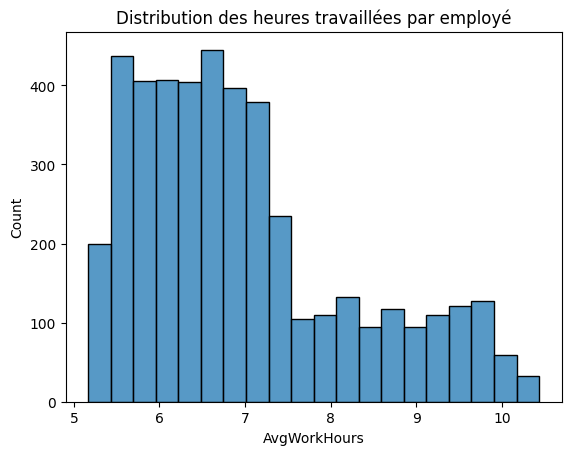

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

employee_summary = time_df.groupby("EmployeeID").agg(
    AvgWorkHours=("WorkDuration", "mean"),
    TotalLongDays=("LongDay", "sum"),
    TotalAbsenceDays=("WorkDuration", lambda x: (x==0).sum())
).reset_index()

sns.histplot(employee_summary["AvgWorkHours"], bins=20)
plt.title("Distribution des heures travaillées par employé")
plt.show()

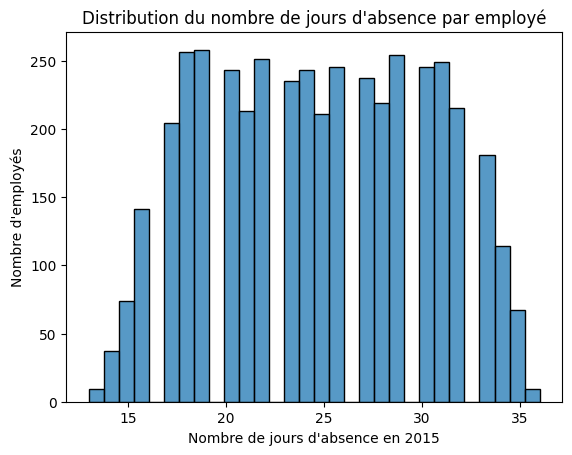

In [41]:
time_df["Absent"] = time_df["WorkDuration"] == 0
absence_per_employee = (
    time_df.groupby("EmployeeID")["Absent"]
    .sum()
    .reset_index(name="AbsenceDays")
)

sns.histplot(absence_per_employee["AbsenceDays"], bins=30)
plt.title("Distribution du nombre de jours d'absence par employé")
plt.xlabel("Nombre de jours d'absence en 2015")
plt.ylabel("Nombre d'employés")
plt.show()

**Sauvegarde dans un fichier**

In [42]:
#fusionner les heures et les dates
time_df = pd.merge(
    in_time_long,
    out_time_long,
    on=["EmployeeID", "Date"],
    how="outer"
)

#conversion
time_df["InTime"] = pd.to_datetime(time_df["InTime"], errors="coerce")
time_df["OutTime"] = pd.to_datetime(time_df["OutTime"], errors="coerce")
time_df["Date"] = pd.to_datetime(time_df["Date"])


In [43]:
#calcul de la durée du travail
time_df["WorkDuration"] = (
    time_df["OutTime"] - time_df["InTime"]
).dt.total_seconds() / 3600

In [44]:
#identification des absences
time_df["Absent"] = time_df["InTime"].isna() & time_df["OutTime"].isna()

In [45]:
#identification des longues journées
time_df["LongDay"] = time_df["WorkDuration"] > 8

In [46]:
#agrégation par employé
employee_summary = time_df.groupby("EmployeeID").agg(
    Days_Worked=("WorkDuration", "count"),
    Absences=("Absent", "sum"),
  
    Long_Days=("LongDay", "sum"),
    Avg_Work_Hours=("WorkDuration", "mean")
).reset_index()

In [47]:
employee_summary.head()

,EmployeeID,Days_Worked,Absences,Long_Days,Avg_Work_Hours
0,1,232,29,0,7.373651
1,2,236,25,42,7.718969
2,3,242,19,0,7.013240
3,4,235,26,0,7.193678
4,5,245,16,115,8.006175


In [48]:
employee_summary.to_csv("Data_cleaned/employee_time_summary.csv", index=False)

# II -Appliquer une EDA globale sur la concaténation des fichiers nettoyés

## II-1 concatenation des fichiers

In [49]:
general = pd.read_csv("Data_cleaned/general_data.csv")
survey = pd.read_csv("Data_cleaned/employee_survey_data.csv")
manager = pd.read_csv("Data_cleaned/manager_survey_data.csv")
summary = pd.read_csv("Data_cleaned/employee_time_summary.csv")

df = pd.merge(
    general,
    survey,
    on="EmployeeID",
    how="left"
)
df = pd.merge(
    df,
    manager,
    on="EmployeeID",
    how="left"
)

df = pd.merge(
    df,
    summary,
    on="EmployeeID",
    how="left"
)

df.to_csv("Data_cleaned/data_global.csv", index=False)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4410 non-null   float64
 14  PercentSalaryHike       

## II-2 Implémentation globale de l 'Exploratory Data Analysis 

In [51]:
#statistiques descriptives globales
#variables numériques
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.000000,30.000000,36.000000,43.000000,60.00000
DistanceFromHome,4410.0,9.192517,8.105026,1.000000,2.000000,7.000000,14.000000,29.00000
Education,4410.0,2.912925,1.023933,1.000000,2.000000,3.000000,4.000000,5.00000
EmployeeID,4410.0,2205.500000,1273.201673,1.000000,1103.250000,2205.500000,3307.750000,4410.00000
JobLevel,4410.0,2.063946,1.106689,1.000000,1.000000,2.000000,3.000000,5.00000
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.000000,29110.000000,49190.000000,83800.000000,199990.00000
NumCompaniesWorked,4410.0,2.691837,2.493912,0.000000,1.000000,2.000000,4.000000,9.00000
PercentSalaryHike,4410.0,15.209524,3.659108,11.000000,12.000000,14.000000,18.000000,25.00000
StockOptionLevel,4410.0,0.793878,0.851883,0.000000,0.000000,1.000000,1.000000,3.00000
TotalWorkingYears,4410.0,11.277324,7.774490,0.000000,6.000000,10.000000,15.000000,40.00000


In [52]:
#variables catégorielles
df.describe(include="object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
count,4410,4410,4410,4410,4410,4410,4410
unique,2,3,3,6,2,9,3
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married
freq,3699,3129,2883,1818,2646,978,2019


**Analyse de la variable cible "Attrition"**

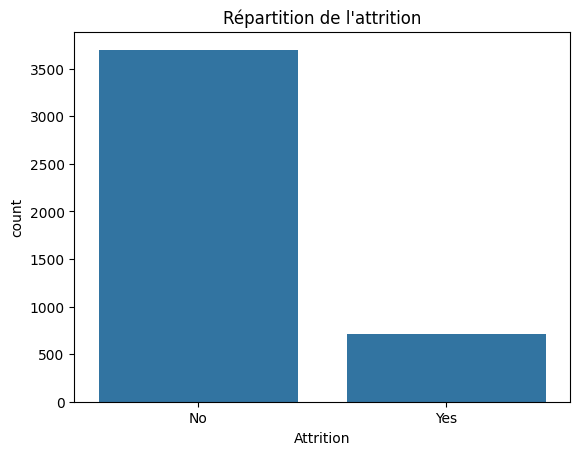

In [53]:
df["Attrition"].value_counts(normalize=True) * 100

#visualisation
sns.countplot(x="Attrition", data=df)
plt.title("Répartition de l'attrition")
plt.show()

L’analyse de la variable cible Attrition permet d’évaluer l’ampleur du phénomène de départ des employés, d’identifier un éventuel déséquilibre de classes et de guider les choix méthodologiques pour les analyses et modèles prédictifs ultérieurs.

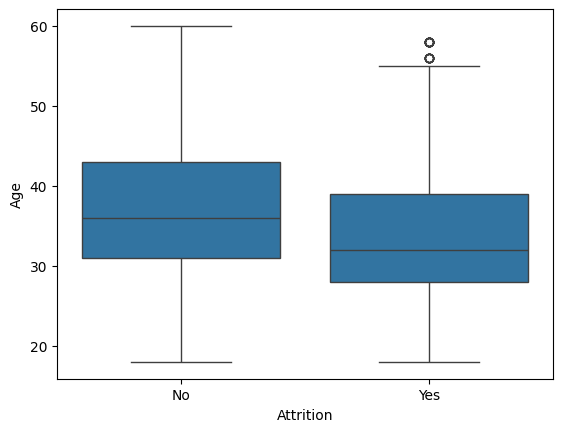

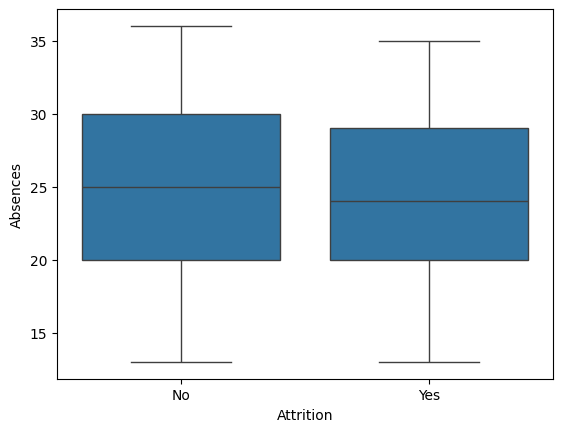

In [54]:
#relations simples avec l'attrition
sns.boxplot(x="Attrition", y="Age", data=df)# relation avec l'age
plt.show()

sns.boxplot(x="Attrition", y="Absences", data=df)# relation avec le nombre d'absences
plt.show()

**Corrélation des variables numériques**

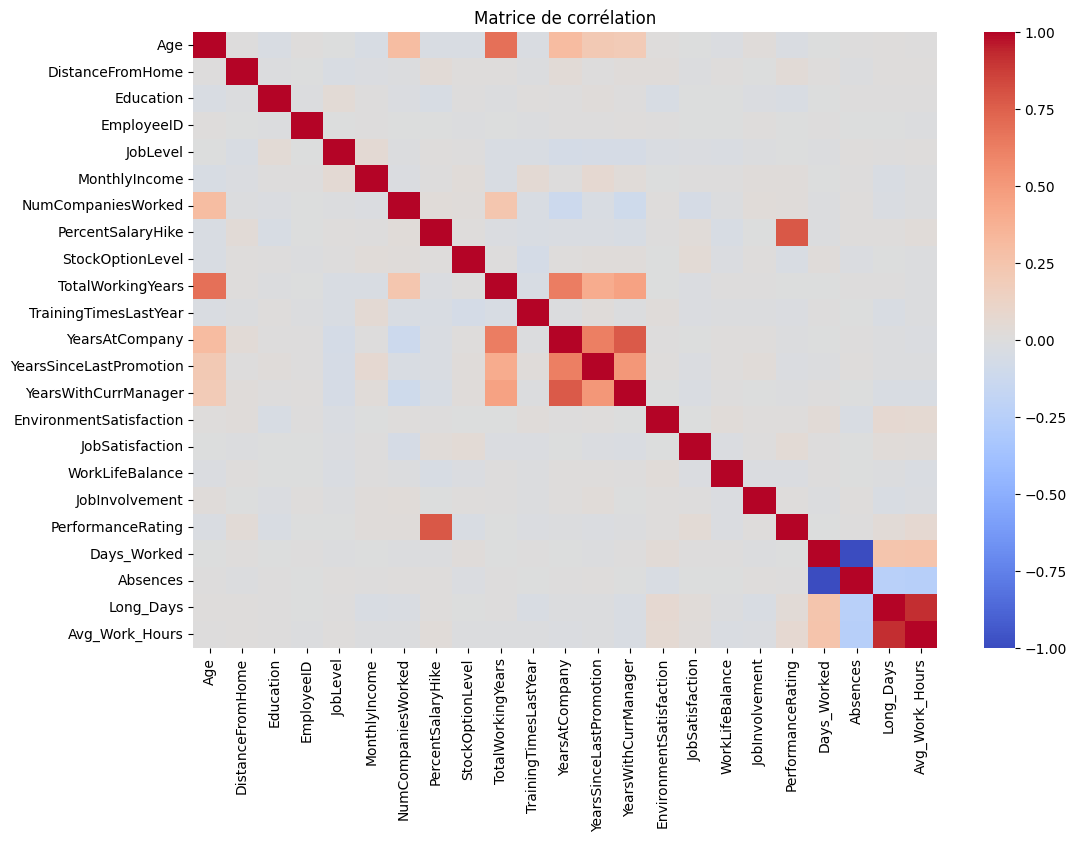

In [55]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),
            cmap="coolwarm", center=0)
plt.title("Matrice de corrélation")
plt.show()

# III- Application de l'ingénieurie des caractéristiques: Feature Engineering 

In [56]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Days_Worked,Absences,Long_Days,Avg_Work_Hours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,0,3.0,4.0,2.0,3,3,232,29,0,7.373651
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,4,3.0,2.0,4.0,2,4,236,25,42,7.718969
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,3,2.0,2.0,1.0,3,3,242,19,0,7.013240
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,5,4.0,4.0,3.0,2,3,235,26,0,7.193678
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,4,4.0,1.0,3.0,3,3,245,16,115,8.006175


In [ ]:
df.columns= 

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Days_Worked',
       'Absences', 'Long_Days', 'Avg_Work_Hours'],
      dtype='object')

**supression des variables qui n'intègrent pas l'ethique de l'intelligence articielle**

| Colonne                                      | Raison de suppression / explication                                                                              |
| -------------------------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| `EmployeeID`                                 | Identifiant unique de chaque employé, inutile pour la prédiction et peut poser des problèmes de confidentialité. |
| `Gender`                                     | Donnée sensible : inclusion pourrait introduire un **biais discriminatoire**.                                    |
| `MaritalStatus`                              | Donnée sensible : statut marital non pertinent pour prédire l’attrition et risque de biais indirect.             |
| `Over18` / `EmployeeCount` / `StandardHours` | Variables **constantes ou techniques**, non informatives pour le modèle.                                         |


In [58]:
cols_to_drop = [
    "EmployeeID", 
    "Gender", 
    "MaritalStatus", 
]

# Suppression des colonnes
df_model = df.drop(columns=cols_to_drop)

# Vérifier le résultat
df_model.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MonthlyIncome,...,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Days_Worked,Absences,Long_Days,Avg_Work_Hours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,131160,...,0,3.0,4.0,2.0,3,3,232,29,0,7.373651
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,41890,...,4,3.0,2.0,4.0,2,4,236,25,42,7.718969
2,32,No,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,193280,...,3,2.0,2.0,1.0,3,3,242,19,0,7.013240
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,83210,...,5,4.0,4.0,3.0,2,3,235,26,0,7.193678
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,23420,...,4,4.0,1.0,3.0,3,3,245,16,115,8.006175


**Séparer les variables explicatives et la cible**

In [59]:
# Variable cible
y = df_model['Attrition']  # Cible

# Variables explicatives
X = df_model.drop(columns=['Attrition'])

**Identifier les colonnes numériques et catégorielles**

In [60]:
# Colonnes numériques
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Colonnes catégorielles
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Colonnes numériques :", num_cols)
print("Colonnes catégorielles :", cat_cols)

Colonnes numériques : ['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Days_Worked', 'Absences', 'Long_Days', 'Avg_Work_Hours']
Colonnes catégorielles : ['BusinessTravel', 'Department', 'EducationField', 'JobRole']


**Préparer le préprocesseur pour encodage et normalisation**

On utilise ColumnTransformer avec :

StandardScaler pour les numériques

OneHotEncoder pour les catégorielles

In [61]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)  # drop='first' pour éviter la colinéarité
    ]
)

# Appliquer le préprocesseur
X_transformed = preprocessor.fit_transform(X)


Reconstruire un DataFrame : 
assembler les valeurs catégorielles encodées et les valeurs numériques

In [62]:
import pandas as pd
import numpy as np

# Récupérer les noms des colonnes après OneHotEncoding
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
feature_names = np.concatenate([num_cols, cat_features])

# Créer le DataFrame final
X_final = pd.DataFrame(
    X_transformed.toarray() if hasattr(X_transformed, "toarray") else X_transformed,
    columns=feature_names
)

# Vérifier
X_final.head()


,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1.541369,-0.393938,-0.891688,-0.961486,1.405136,-0.678464,-1.150554,-0.932014,-1.322079,2.483396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.648668,0.099639,-1.868426,-0.961486,-0.491661,-1.079486,2.129306,0.241988,-0.678877,0.155707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.539166,0.963398,1.061787,1.749610,2.725053,-0.678464,-0.057267,2.589994,-0.807517,-0.620189,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.117845,-0.887515,2.038524,0.845911,0.386301,0.123580,-1.150554,2.589994,0.221606,1.707500,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.539166,0.099639,-1.868426,-0.961486,-0.884109,0.524602,-0.877232,1.415991,-0.292956,-0.620189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [73]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   float64
 1   DistanceFromHome                   4410 non-null   float64
 2   Education                          4410 non-null   float64
 3   JobLevel                           4410 non-null   float64
 4   MonthlyIncome                      4410 non-null   float64
 5   NumCompaniesWorked                 4410 non-null   float64
 6   PercentSalaryHike                  4410 non-null   float64
 7   StockOptionLevel                   4410 non-null   float64
 8   TotalWorkingYears                  4410 non-null   float64
 9   TrainingTimesLastYear              4410 non-null   float64
 10  YearsAtCompany                     4410 non-null   float64
 11  YearsSinceLastPromotion            4410 non-null   float

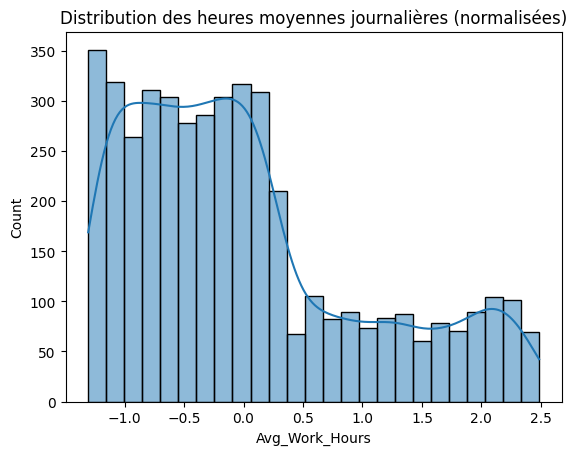

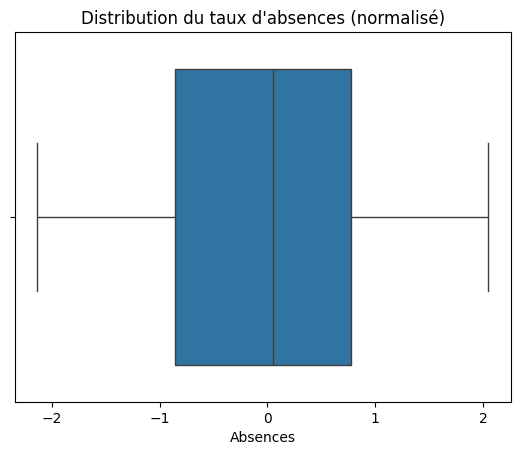

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple : distribution d'une variable numérique normalisée
sns.histplot(X_final['Avg_Work_Hours'], kde=True)
plt.title("Distribution des heures moyennes journalières (normalisées)")
plt.show()

# Exemple : boxplot des absences normalisées
sns.boxplot(x=X_final['Absences'])
plt.title("Distribution du taux d'absences (normalisé)")
plt.show()


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des variables numériques
numeric_cols = df_model.select_dtypes(include=["int64", "float64"]).columns

numeric_cols

Index(['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Days_Worked', 'Absences',
       'Long_Days', 'Avg_Work_Hours'],
      dtype='object')

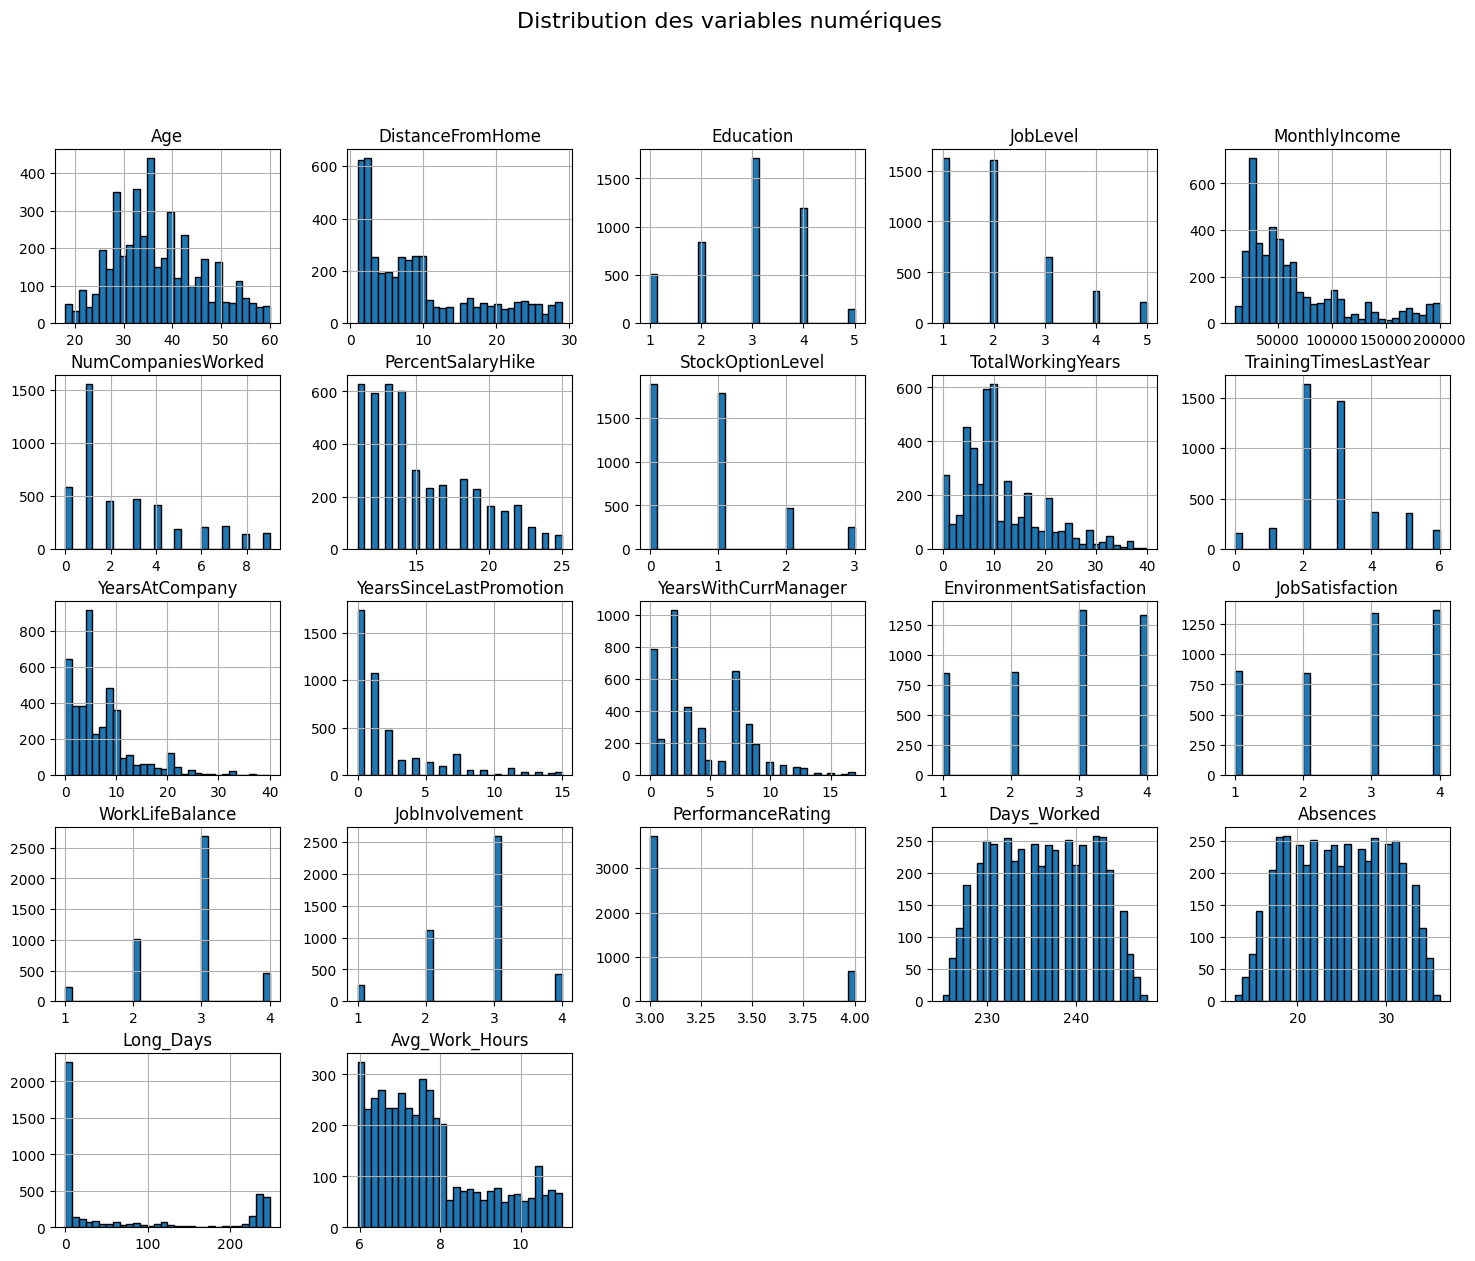

In [65]:
df_model[numeric_cols].hist(
    figsize=(18, 14),
    bins=30,
    edgecolor="black"
)
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.show()

encoder la variable cible

In [66]:
df["Attrition"].value_counts()

Attrition
No     3699
Yes     711
Name: count, dtype: int64

In [67]:
df["Attrition"] = df["Attrition"].map({"No": 0, "Yes": 1})

In [68]:
df["Attrition"].dtype

dtype('int64')

**correlation des variables**

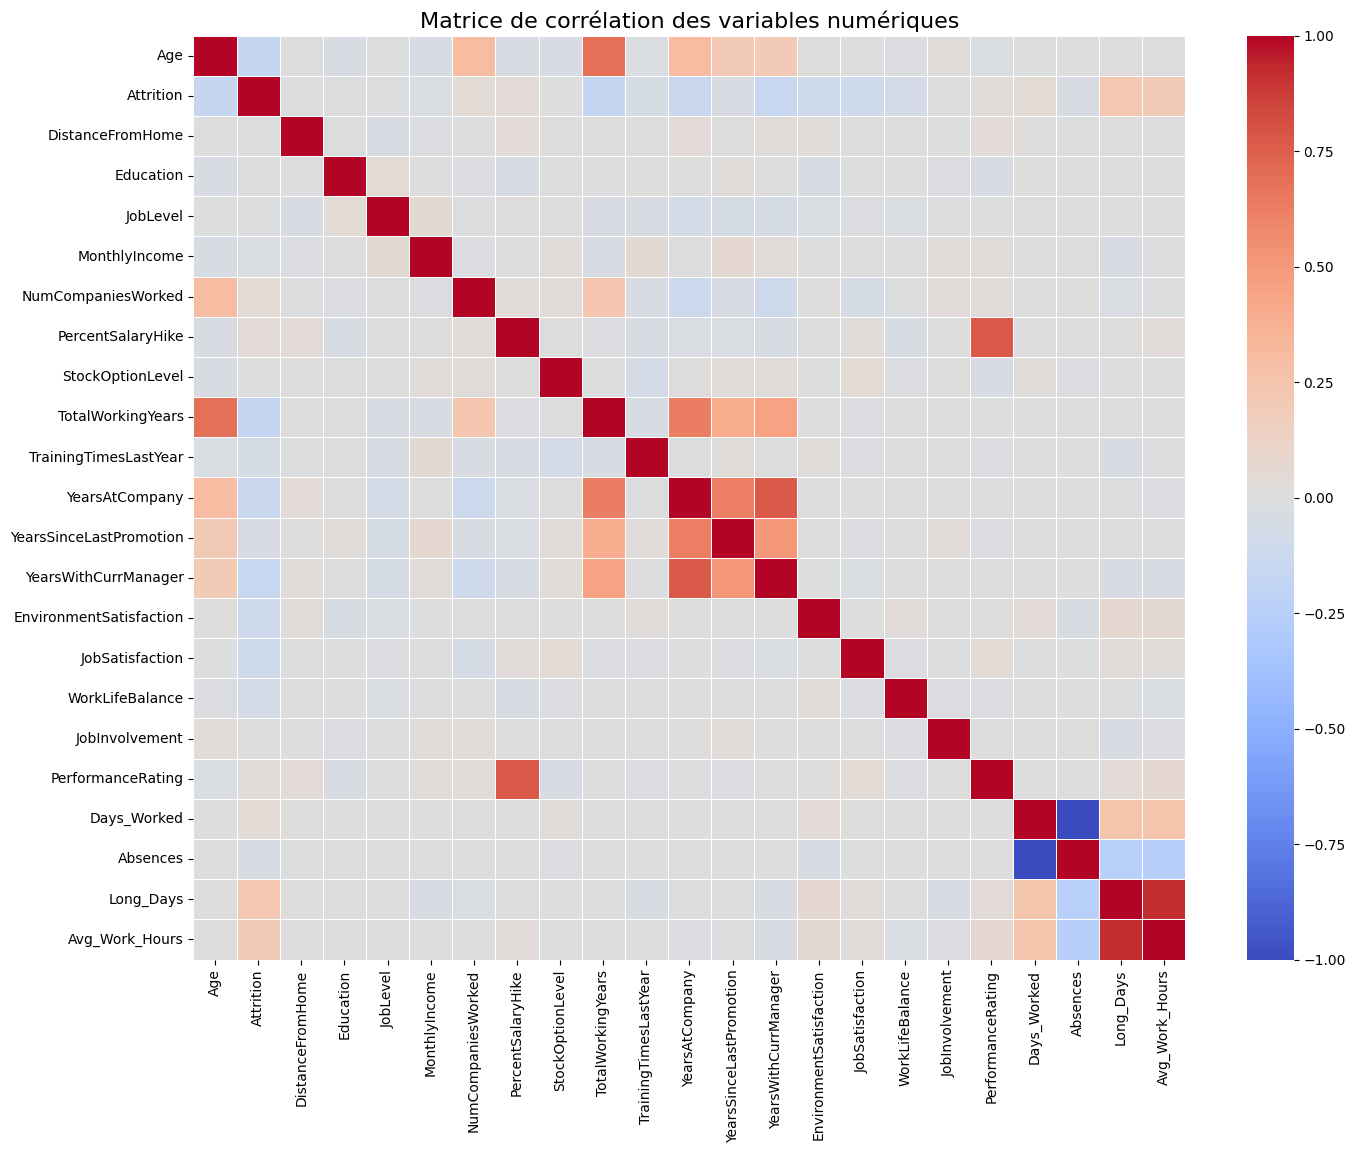

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

df=df.drop(columns=cols_to_drop)
# Sélection des variables numériques (incluant Attrition encodée)
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Calcul de la matrice de corrélation
corr_matrix = numeric_df.corr()

# Visualisation
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Matrice de corrélation des variables numériques", fontsize=16)
plt.show()


In [70]:
corr_with_attrition = corr_matrix["Attrition"].sort_values(ascending=False)
corr_with_attrition


Attrition                  1.000000
Long_Days                  0.233609
Avg_Work_Hours             0.201688
Days_Worked                0.043517
NumCompaniesWorked         0.042064
PercentSalaryHike          0.032533
PerformanceRating          0.023403
StockOptionLevel          -0.006839
DistanceFromHome          -0.009730
JobLevel                  -0.010290
Education                 -0.015111
JobInvolvement            -0.015588
MonthlyIncome             -0.031176
YearsSinceLastPromotion   -0.033019
Absences                  -0.043517
TrainingTimesLastYear     -0.049431
WorkLifeBalance           -0.062975
EnvironmentSatisfaction   -0.101625
JobSatisfaction           -0.103068
YearsAtCompany            -0.134392
YearsWithCurrManager      -0.156199
Age                       -0.159205
TotalWorkingYears         -0.170162
Name: Attrition, dtype: float64

L’analyse de corrélation montre que l’attrition est principalement associée à la charge de travail (longues journées, durée moyenne de travail) et à des facteurs de bien-être tels que la satisfaction au travail, l’environnement professionnel et la stabilité dans l’entreprise. Les variables liées à l’ancienneté et à l’expérience présentent une corrélation négative, indiquant un effet protecteur contre le départ des employés.